In [115]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import mysql.connector

### Outils/Function

In [116]:

config = {
  'user': 'root',
  'password': 'root',
  'host': 'localhost',
  "port": 3306,
  'database': 'sdd4',
  'raise_on_warnings': True
}

bdd = mysql.connector.connect(**config)
FIGSIZE = (10,6)

In [117]:
def import_financialbehavior_table(bdd)->pd.DataFrame:
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM financial_behavior")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns = columns)
    df = df.set_index("idTB")

    return df 

def import_tweets_table(bdd) -> pd.DataFrame: 
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM tweets")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns = columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    df = df.set_index("idT")

    return df 

def import_bigmacindex_table(bdd) -> pd.DataFrame: 
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM bigmacindex")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns = columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    for columns in df.columns: 
        if columns != "observation_date": 
            df[columns] = df[columns].astype(float)
    df = df.set_index("idBM")

    return df 

def import_bitcoinperformance_table(bdd) ->pd.DataFrame: 
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM bitcoinperformance")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns = columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    for columns in df.columns: 
        if columns != "observation_date": 
            df[columns] = df[columns].astype(float)
    df = df.set_index("idB")

    return df 

def import_sp500_table(bdd)->pd.DataFrame:
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM standardandpoor")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns = columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    df = df.set_index("idSP")

    return df

def import_inflation_table(bdd) ->pd.DataFrame:
    cursor = bdd.cursor()
    cursor = bdd.cursor()
    cursor.execute("SELECT * FROM inflation")
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(cursor.fetchall(),columns=columns)
    df["observation_date"] = pd.to_datetime(df["observation_date"])
    df["CPI"] = df["CPI"].astype(float)
    df = df.set_index("idI")

    return df

In [118]:

def window_data(df:pd.DataFrame):
    x = []
    y = [] 
    for i in range(len(df)-1):
        x.append(df.iloc[i])
        y.append(df.iloc[i + 1])

    return x,y

def plot_corr(df:pd.DataFrame,figsize:tuple = FIGSIZE,title: str = None) -> None: 
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap="coolwarm")
    if title:
        plt.title(title)
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)

    plt.show()

def plot_linear(df:pd.DataFrame,title:str = None,figsize:tuple = FIGSIZE) -> None:
    x,y = window_data(df)
    plt.figure(figsize=figsize)
    plt.plot(x,y,"o")
    if title:
        plt.title(title)
    plt.xlabel(f"{df.name} Times: t")
    plt.ylabel(f"{df.name} Times: t+1")

    plt.show()

def plot_datetime(df:pd.DataFrame,y_index_name: str,date_index_name: str = "observation_date",title: str = None,figsize:tuple = FIGSIZE) -> None:
    x = pd.to_datetime(df[date_index_name])
    y = df[y_index_name]
    plt.figure(figsize=figsize)
    plt.plot(x,y)
    plt.xlabel(y_index_name)
    plt.ylabel(date_index_name)
    if title: 
        plt.title(title)

    plt.show()

def plot_boxplot(df:pd.DataFrame,x_index_name:str,figsize:tuple = FIGSIZE)->None:
    plt.figure(figsize=figsize)
    plt.boxplot(df[x_index_name])
    plt.title(f"Boxplot de {x_index_name}")
    plt.show()
    
def plot_histplot(df:pd.DataFrame,x_index_name,figsize: tuple = FIGSIZE, y_label: str = "nombre d'observation",bins: int = 50)->None:
    plt.figure(figsize=figsize)
    sns.histplot(df[x_index_name],bins= bins)
    plt.title(f"Distribution de {x_index_name}")
    plt.show()

### 1.Inflation 

In [119]:
inflation = import_inflation_table(bdd)
inflation

,observation_date,CPI
idI,,
1,1913-01-01,9.800
2,1913-02-01,9.800
3,1913-03-01,9.800
4,1913-04-01,9.800
5,1913-05-01,9.800
...,...,...
1293,2020-09-01,257.971
1294,2020-10-01,257.971
1295,2020-11-01,257.971


In [120]:
inflation.iloc[:,1::].describe().round(2)

,CPI
count,1297.00
mean,80.46
std,78.45
min,9.80
25%,17.40
50%,32.90
75%,146.20
max,261.58


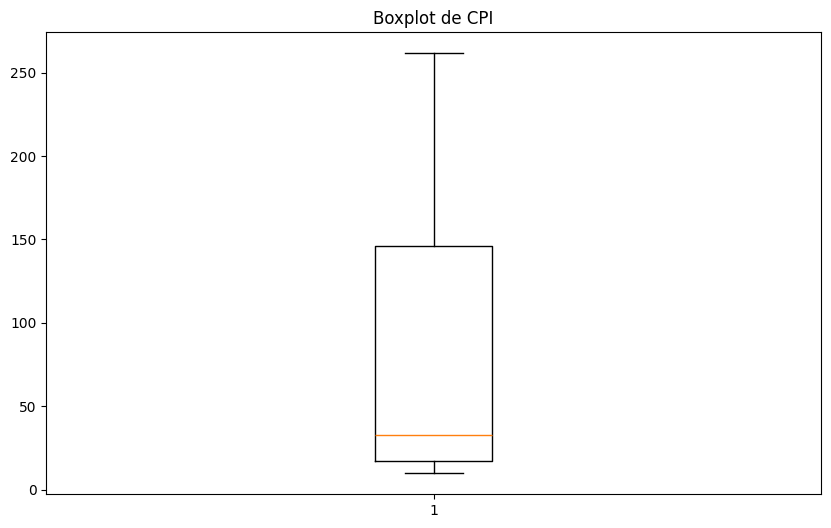

In [121]:
plot_boxplot(inflation,"CPI")

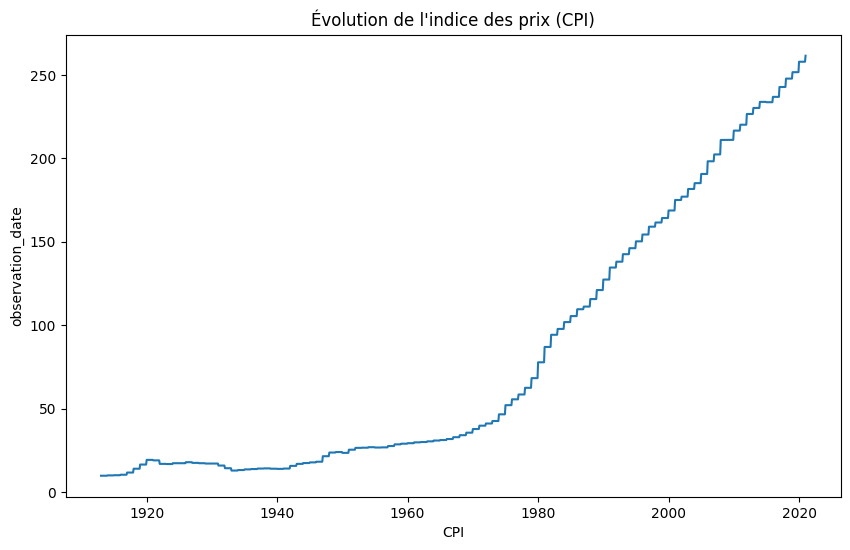

In [122]:
plot_datetime(inflation,"CPI",title="Évolution de l'indice des prix (CPI)")

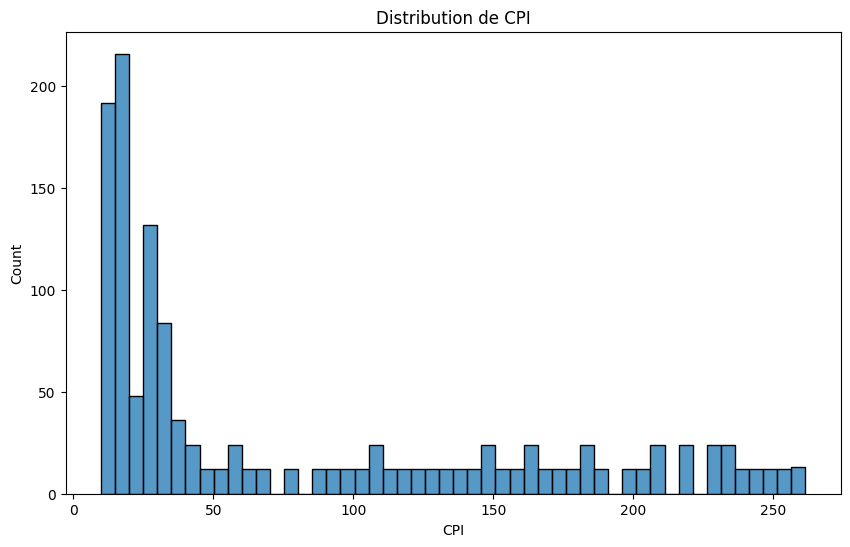

In [123]:

plot_histplot(inflation,"CPI")

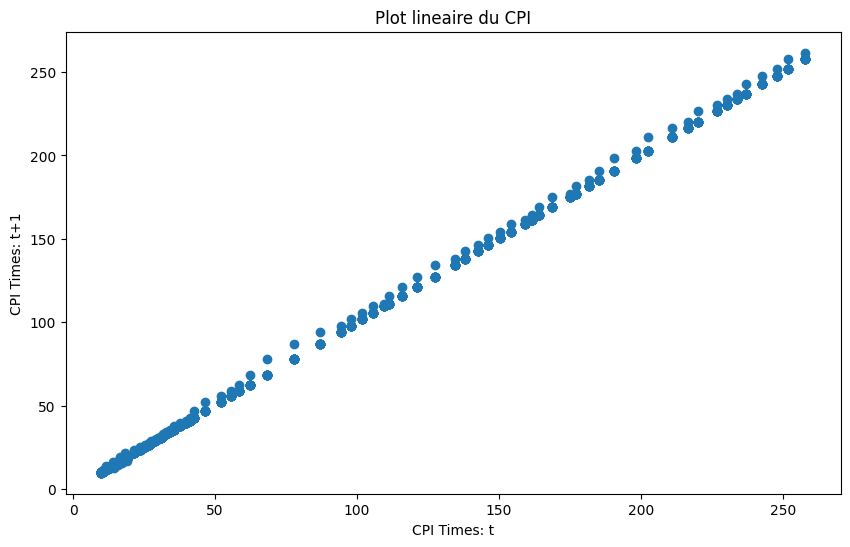

In [124]:
plot_linear(inflation["CPI"],"Plot lineaire du CPI")

### 2. Table StandarAndPoor

In [125]:
df = import_sp500_table(bdd)
df


,observation_date,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
idSP,,,,,,,,
2,1871-01-01,4.515,0.26,0.40,5.335,111.325,6.41,9.86
3,1871-02-01,4.500,0.26,0.40,5.320,107.250,6.20,9.53
4,1871-03-01,4.610,0.26,0.40,5.330,108.270,6.11,9.39
5,1871-04-01,4.740,0.26,0.40,5.330,115.540,6.34,9.75
6,1871-05-01,4.860,0.26,0.40,5.330,121.220,6.48,9.98
...,...,...,...,...,...,...,...,...
1830,2023-05-01,4146.170,68.54,179.17,3.570,4173.450,68.99,180.35
1831,2023-06-01,4345.370,68.71,181.17,3.750,4359.880,68.94,181.77
1832,2023-07-01,4508.080,68.71,181.17,3.900,4514.510,68.94,181.77


In [126]:
df.iloc[:,1::].describe().round(2)

,sp500,dividend,earnings,longInterestRate,realPrice,realDividend,realEarnings
count,1833.00,1833.00,1833.00,1833.00,1833.00,1833.00,1833.00
mean,377.52,7.59,17.88,4.49,744.21,20.33,41.43
std,809.04,13.88,35.22,2.30,915.49,13.65,38.05
min,2.73,0.18,0.16,0.62,82.87,6.11,5.13
25%,8.01,0.42,0.57,3.15,210.60,10.58,15.91
50%,18.25,0.93,1.55,3.80,324.81,16.23,26.98
75%,184.90,7.77,15.01,5.10,812.87,25.77,50.03
max,4674.77,68.71,197.91,15.32,5140.59,71.22,217.26


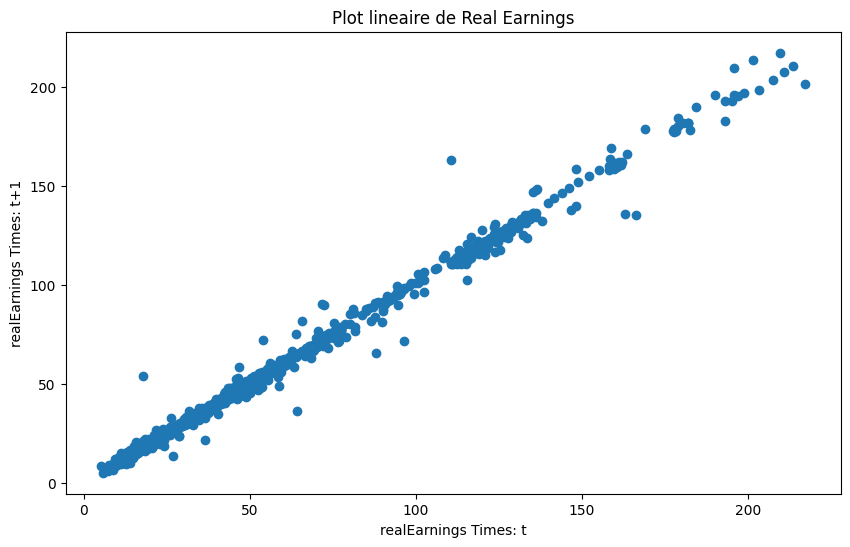

In [127]:
plot_linear(df["realEarnings"],title= "Plot lineaire de Real Earnings")



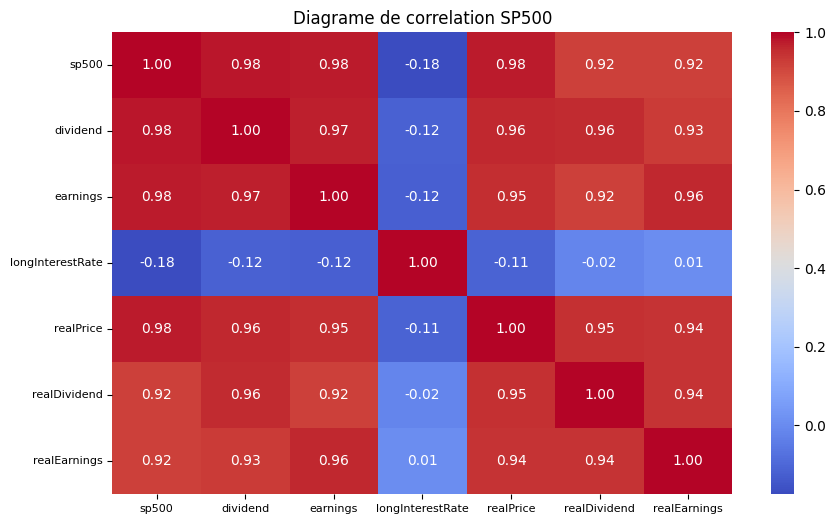

In [128]:
plot_corr(df.iloc[:, 1:],title="Diagrame de correlation SP500")

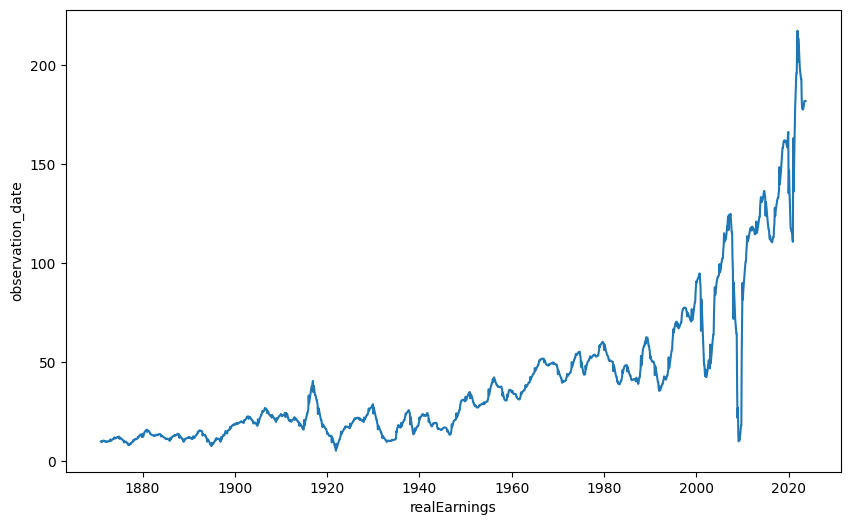

In [129]:
plot_datetime(df,"realEarnings")

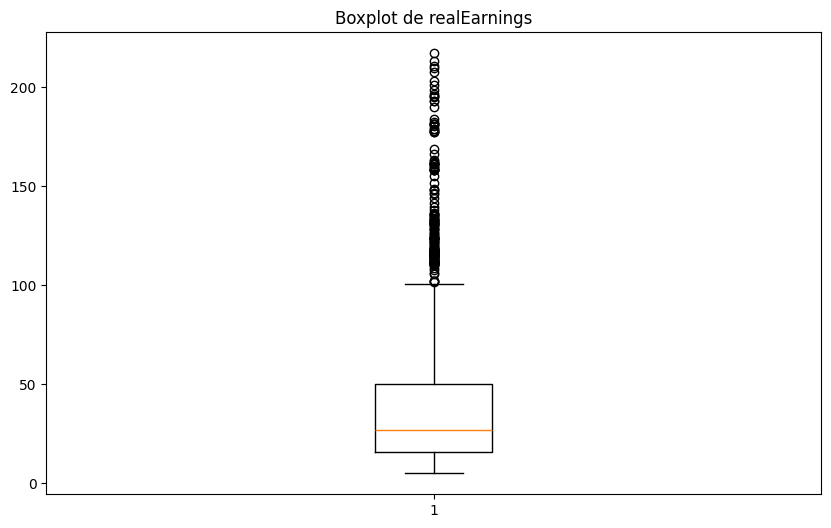

In [130]:
plot_boxplot(df,"realEarnings")

### 3. Bitcoin performance

In [131]:
df = import_bitcoinperformance_table(bdd)
df

,observation_date,Open,High,Low,Close,Adj_Close,Volume
idB,,,,,,,
1.0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2.0,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3.0,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4.0,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
5.0,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...,...
3409.0,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
3410.0,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
3411.0,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10


In [132]:
df.iloc[:,1::].describe().round(2)

,Open,High,Low,Close,Adj_Close,Volume
count,3413.00,3413.00,3413.00,3413.00,3413.00,3.413000e+03
mean,14755.13,15099.73,14383.72,14765.98,14765.98,1.663294e+10
std,16297.57,16687.92,15859.79,16299.47,16299.47,1.907392e+10
min,176.90,211.73,171.51,178.10,178.10,5.914570e+06
25%,922.07,937.53,910.42,921.79,921.79,1.689680e+08
50%,8290.76,8470.99,8110.77,8293.87,8293.87,1.180170e+10
75%,24373.46,25020.46,23927.91,24402.82,24402.82,2.696772e+10
max,67549.73,68789.62,66382.06,67566.83,67566.83,3.509679e+11


### 4. BigMac Index 


In [133]:
df = import_bigmacindex_table(bdd)
df

,observation_date,dollar_price
idBM,,
1.0,2000-04-02,2.32393
2.0,2000-04-03,2.32393
3.0,2000-04-04,2.32393
4.0,2000-04-05,2.32393
5.0,2000-04-06,2.32393
...,...,...
8122.0,2022-06-27,3.91548
8123.0,2022-06-28,3.91548
8124.0,2022-06-29,3.91548


In [134]:
df.iloc[:,1::].describe().round(2)

,dollar_price
count,8126.00
mean,3.32
std,0.62
min,2.16
25%,2.72
50%,3.65
75%,3.77
max,4.13


### 5. Tweets 

In [135]:
df = import_tweets_table(bdd)
df 

,observation_date,tweet_text,source,verified,idTJ
idT,,,,,
2,2018-07-01,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,True,1771.0
3,2018-07-01,The price of lumber $LB_F is down 22% since hi...,StockTwits,True,1771.0
4,2018-07-01,Who says the American Dream is dead? https://t...,TheStreet,True,1771.0
5,2018-07-01,Barry Silbert is extremely optimistic on bitco...,MarketWatch,True,1771.0
6,2018-07-01,How satellites avoid attacks and space junk wh...,Forbes,True,1771.0
...,...,...,...,...,...
21889,2018-07-01,Exxon Once a ‘Perfect Machine’ Is Running Dry ...,danhyder,False,1771.0
21890,2018-07-01,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,keizai_toushi17,False,1771.0
21891,2018-07-01,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,iad81,False,1771.0


### 6. Financial Behavior 

In [136]:
df = import_financialbehavior_table(bdd)
df

,tweet_content,emotion,financial_behavior
idTB,,,
0,Hidden fees on loans are just unethical! #Fina...,Disgust,Good behavior
1,Predatory loans are a trap—know the risks befo...,Disgust,Risky behavior
2,Did you know investing $100 monthly can grow t...,Surprise,Moderate behavior
3,"Surprisingly, budgeting apps can save up to 20...",Surprise,Risky behavior
4,Imagine achieving financial independence by 40...,Anticipation,Moderate behavior
...,...,...,...
495,,Disgust,Good behavior
496,,Fear,Good behavior
497,,Positive,Moderate behavior
